<a href="https://colab.research.google.com/github/likarajo/mnist_digits/blob/master/_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train data (5000, 1, 28, 28)
Train labels (5000,)
Test data (1000, 1, 28, 28)
Test labels (1000,)
Training started...
epoch		time		Train Loss		Vali Acc
1		3.25s		11598.31		0.0940
2		3.38s		11555.69		0.0940
3		3.36s		11528.86		0.1000
4		3.36s		11513.82		0.0990
5		3.31s		11506.13		0.0990
6		3.30s		11502.74		0.1260
7		3.29s		11501.27		0.1260
8		3.30s		11500.64		0.1260
9		3.25s		11500.37		0.1260
10		3.27s		11500.27		0.1260
11		3.22s		11500.22		0.1260
12		3.26s		11500.20		0.1260
13		3.26s		11500.20		0.1260
14		3.22s		11500.20		0.1260
15		3.22s		11500.20		0.1260
16		3.22s		11500.20		0.1260
17		3.20s		11500.20		0.1260
18		3.24s		11500.20		0.1260
19		3.30s		11500.20		0.1260
20		3.27s		11500.20		0.1260
21		3.23s		11500.20		0.1260
22		3.24s		11500.20		0.1260
23		3.28s		11500.20		0.1260
24		3.24s		11500.20		0.1260
25		3.24s		11500.20		0.1260
26		3.23s		11500.20		0.1260
27		3.29s		11500.20		0.1260
28		3.34s		11500.20		0.1260
29		3.31s		11500.20		0.1260
30		3.30s		11500.20		0.1260
31		3.29s		11500.

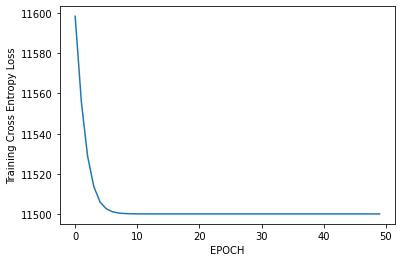

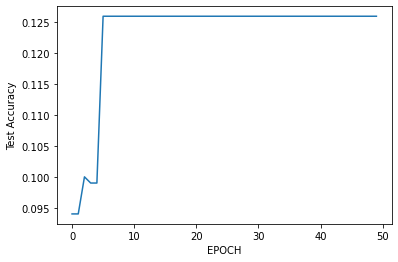

Training Time Taken:  163.68509531021118
Layer type		Input size			Output size
Normalize		(28, 28)			(28, 28)
Vectorizer		(28, 28)			(1, 784)
MatrixMult		(1, 784)			(1, 50)
Addition		(1, 50)			(1, 50)
ReLUActi		0			0
MatrixMult		(1, 50)			(1, 20)
Addition		(1, 20)			(1, 20)
ReLUActi		0			0
MatrixMult		(1, 20)			(1, 10)
Addition		(1, 10)			(1, 10)
SoftMaxActi		0			0


In [59]:
################################################################################
#
# LOGISTICS
#
#    Rajarshi Chattopadhyay
#    RXC170010
#
# DESCRIPTION
#
#    MNIST image classification with an xNN written and trained in Python
#
# INSTRUCTIONS
#
#    1. Go to Google Colaboratory: https://colab.research.google.com/notebooks/welcome.ipynb
#    2. File - New Python 3 notebook
#    3. Cut and paste this file into the cell (feel free to divide into multiple cells)
#    4. Runtime - Run all
#
# NOTES
#
#    1. This does not use PyTorch, TensorFlow or any other xNN library
#
#    2. Include a short summary here in nn.py of what you did for the neural
#       network portion of code
#
#    3. Include a short summary here in cnn.py of what you did for the
#       convolutional neural network portion of code
#
#    4. Include a short summary here in extra.py of what you did for the extra
#       portion of code
#
################################################################################

################################################################################
#
# IMPORT
#
################################################################################

#
# you should not need any import beyond the below
# PyTorch, TensorFlow, ... is not allowed
#

import os.path
import urllib.request
import gzip
import math
import numpy             as np
import matplotlib.pyplot as plt
from time import time

################################################################################
#
# PARAMETERS
#
################################################################################

# hyper parameters
LEARNING_RATE = 0.001
NUM_EPOCHS = 5
STABILIZING_CONSTANT = 1e-5

# data
DATA_NUM_TRAIN = 60000
DATA_NUM_TEST = 10000
DATA_CHANNELS = 1
DATA_ROWS = 28
DATA_COLS = 28
DATA_CLASSES = 10
DATA_URL_TRAIN_DATA = 'http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz'
DATA_URL_TRAIN_LABELS = 'http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz'
DATA_URL_TEST_DATA = 'http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz'
DATA_URL_TEST_LABELS = 'http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz'
DATA_FILE_TRAIN_DATA = 'train_data.gz'
DATA_FILE_TRAIN_LABELS = 'train_labels.gz'
DATA_FILE_TEST_DATA = 'test_data.gz'
DATA_FILE_TEST_LABELS = 'test_labels.gz'

# display
DISPLAY_ROWS = 8
DISPLAY_COLS = 4
DISPLAY_COL_IN = 10
DISPLAY_ROW_IN = 25
DISPLAY_NUM = DISPLAY_ROWS * DISPLAY_COLS

################################################################################
#
# DATA
#
################################################################################

# download
if not os.path.exists(DATA_FILE_TRAIN_DATA):
    urllib.request.urlretrieve(DATA_URL_TRAIN_DATA, DATA_FILE_TRAIN_DATA)
if not os.path.exists(DATA_FILE_TRAIN_LABELS):
    urllib.request.urlretrieve(DATA_URL_TRAIN_LABELS, DATA_FILE_TRAIN_LABELS)
if not os.path.exists(DATA_FILE_TEST_DATA):
    urllib.request.urlretrieve(DATA_URL_TEST_DATA, DATA_FILE_TEST_DATA)
if not os.path.exists(DATA_FILE_TEST_LABELS):
    urllib.request.urlretrieve(DATA_URL_TEST_LABELS, DATA_FILE_TEST_LABELS)

# training data
# unzip the file, skip the header, read the rest into a buffer and format to NCHW
file_train_data = gzip.open(DATA_FILE_TRAIN_DATA, 'r')
file_train_data.read(16)
buffer_train_data = file_train_data.read(DATA_NUM_TRAIN * DATA_ROWS * DATA_COLS)
train_data = np.frombuffer(buffer_train_data, dtype=np.uint8).astype(np.float32)
train_data = train_data.reshape(DATA_NUM_TRAIN, 1, DATA_ROWS, DATA_COLS)

# training labels
# unzip the file, skip the header, read the rest into a buffer and format to a vector
file_train_labels = gzip.open(DATA_FILE_TRAIN_LABELS, 'r')
file_train_labels.read(8)
buffer_train_labels = file_train_labels.read(DATA_NUM_TRAIN)
train_labels = np.frombuffer(buffer_train_labels, dtype=np.uint8).astype(np.int32)

# testing data
# unzip the file, skip the header, read the rest into a buffer and format to NCHW
file_test_data = gzip.open(DATA_FILE_TEST_DATA, 'r')
file_test_data.read(16)
buffer_test_data = file_test_data.read(DATA_NUM_TEST * DATA_ROWS * DATA_COLS)
test_data = np.frombuffer(buffer_test_data, dtype=np.uint8).astype(np.float32)
test_data = test_data.reshape(DATA_NUM_TEST, 1, DATA_ROWS, DATA_COLS)

# testing labels
# unzip the file, skip the header, read the rest into a buffer and format to a vector
file_test_labels = gzip.open(DATA_FILE_TEST_LABELS, 'r')
file_test_labels.read(8)
buffer_test_labels = file_test_labels.read(DATA_NUM_TEST)
test_labels = np.frombuffer(buffer_test_labels, dtype=np.uint8).astype(np.int32)

# debug
# print("Train data", train_data.shape)   # (60000, 1, 28, 28)
# print("Train labels", train_labels.shape) # (60000,)
# print("Test data", test_data.shape)    # (10000, 1, 28, 28)
# print("Test label", test_labels.shape)  # (10000,)

################################################################################
#
# YOUR CODE GOES HERE
#
################################################################################

# Functions

def cast_dim(dim):
    return (dim,) if type(dim) != tuple and type(dim) != list else list(dim)

def cross_entropy_loss(x, x_true):
    return -1 * np.log(x[x_true] + STABILIZING_CONSTANT)

# Classes

class Layer:
    def __init__(self, input_dim):
        self.input_dim = input_dim
        self.input_size = input_dim
        self.output_size = input_dim
        self.param_size = 0
        pass

    def forward(self, input):
        self.output = input 
        return self.output

    def backward(self, loss):
        pass

    def update(self, lr):
        return


class WeightedLayer(Layer):
    def __init__(self, input_dim, weight_dim):
        self.weight_dim = weight_dim
        super().__init__(input_dim)
        self.weights = np.random.uniform(0, 1, weight_dim)
        self.update_weights = np.zeros(weight_dim)
        self.input_size = input_dim
        self.output_size = input_dim
        self.param_size = weight_dim

    def forward(self, input):
        return super().forward(input)

    def backward(self, loss):
        return super().backward(loss)

    def update(self, lr):
        self.weights -= lr * self.update_weights
        self.update_weights = np.zeros(self.weight_dim)


class Normalize(Layer):
    def __init__(self, input_dim, norm_constant):
        super().__init__(input_dim)
        self.norm_constant = norm_constant
        self.input_size = input_dim
        self.output_size = input_dim
        self.param_size = 0

    def forward(self, input):
        return super().forward(input / self.norm_constant)

    def backward(self, derivative):
        # return derivative
        return None


class Vectorizer(Layer):
    def __init__(self, input_dim):
        super().__init__(input_dim)
        self.output_dim = (1, np.product(input_dim))
        self.input_size = input_dim
        self.output_size = self.output_dim
        self.param_size = 0

    def forward(self, input):
        return super().forward(np.reshape(input, self.output_dim))

    def backward(self, derivative):
        # return np.reshape(derivative, self.input_dim)
        return None


class MatrixMult(WeightedLayer):
    def __init__(self, input_dim, output_dim):
        input_dim = cast_dim(input_dim)
        output_dim = cast_dim(output_dim)
        self.h_dim = (input_dim[-1], output_dim[-1])
        super().__init__(self, self.h_dim)
        self.input_size = (input_dim[0], input_dim[1])
        self.output_size = (output_dim[0], output_dim[1])
        self.param_size = 0

    def forward(self, input):
        self.input = input
        return super().forward(np.matmul(input, self.weights))

    def backward(self, derivative):
        self.update_weights += np.matmul(np.transpose(self.input), derivative)
        return np.matmul(derivative, np.transpose(self.weights))


class Addition(WeightedLayer):
    def __init__(self, input_dim):
        input_dim = cast_dim(input_dim)
        self.h_dim = input_dim
        super().__init__(self, self.h_dim)
        self.input_size = (input_dim[0], input_dim[1])
        self.output_size = (input_dim[0], input_dim[1])
        self.param_size = 0

    def forward(self, input):
        return super().forward(self.weights + input)

    def backward(self, derivative):
        self.update_weights += derivative
        return derivative


class ReLUActi(Layer):
    def __init__(self):
        self.input_size = 0
        self.output_size = 0
        self.param_size = 0
        pass

    def forward(self, input):
        self.input = input
        return super().forward(np.maximum(input, 0))

    def backward(self, derivative):
        return derivative * (self.output > 0)


class SoftMaxActi(Layer):
    def __init__(self):
        self.input_size = 0
        self.output_size = 0
        self.param_size = 0
        pass

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return np.exp(e_x) / np.sum(np.exp(e_x))

    def forward(self, input):
        return super().forward(self.softmax(input))

    def backward(self, x_true):
        derivative = self.output
        derivative[0][x_true] -= 1
        return derivative


class Model:
    def __init__(self, hiddenLayers=[10, 5]):
        self.layers = [
            Normalize((28,28),255.0),
            Vectorizer((28,28)),
            MatrixMult((1,28**2),(1,hiddenLayers[0])),
            Addition((1,hiddenLayers[0])),
            ReLUActi(),
            MatrixMult((1,hiddenLayers[0]),(1,hiddenLayers[1])),
            Addition((1,hiddenLayers[1])),
            ReLUActi(),
            MatrixMult((1,hiddenLayers[1]),(1,10)),
            Addition((1,10)),
            SoftMaxActi()
        ]
        self.loss = cross_entropy_loss

    def forward(self, input):
        output = input
        for layer in self.layers:
            output = layer.forward(output)
        return output[0]

    def backward(self, back):
        for layer in reversed(self.layers):
            back = layer.backward(back)

    def update(self, lr):
        for layer in self.layers:
            layer.update(lr)


################ Main ######################################

num_train_data = 5000
num_test_data = 1000

train_data = train_data[:num_train_data]
train_labels = train_labels[:num_train_data]
test_data = test_data[:num_test_data]
test_labels = test_labels[:num_test_data]
print("Train data", train_data.shape) 
print("Train labels", train_labels.shape)
print("Test data", test_data.shape)
print("Test labels", test_labels.shape)

layers_config = [50, 20]
num_epochs = 50

model = Model(hiddenLayers=layers_config)

t = time()

print("Training started...")

train_loss_list = []
test_acc_list = []

# iterate through epochs
print('epoch'+'\t'*2+'time'+'\t'*2+'Train Loss'+'\t'*2+'Vali Acc')
for epoch in range(num_epochs):
    s = time()
    lr = LEARNING_RATE
    
    train_loss = 0.0
    # cycle through the training data
    for i in range(len(train_data)):
        X = train_data[i]
        y = train_labels[i]
        pred = model.forward(X) # forward pass
        train_loss += cross_entropy_loss(pred, y) # loss
        model.backward(y) # back prop
        model.update(lr) # weight update
    train_loss_list.append(train_loss)

    test_correct = 0
    # cycle through the test data
    for i in range(len(test_data)):
        X = test_data[i]
        y = test_labels[i]
        pred = model.forward(X) # forward pass
        test_correct += (np.argmax(pred)==y)
    test_acc = test_correct/len(test_data) # accuracy
    test_acc_list.append(test_acc)

    e = time()

    # per epoch display (epoch, time, training loss, testing accuracy)
    print('\r'+'{0}'.format(epoch+1)+'\t'*2+'{0:.2f}s'.format(e-s)+'\t'*2+'{0:.2f}'.format(train_loss)+'\t'*2+'{0:.4f}'.format(test_acc))

print("Training completed.")

time_taken = time() - t

test_predicted_labels = []
test_loss = 0
num_correct = 0
for X, y in zip(test_data, test_labels):
    pred = model.forward(X) # forward pass
    test_predicted_labels.append(np.argmax(pred))
    test_loss += cross_entropy_loss(pred, y)
    num_correct += (np.argmax(pred)==y)
test_acc = num_correct / len(test_data) # accuracy

################################################################################
#
# DISPLAY
#
################################################################################

# accuracy display
print('Test Accuracy: ', test_acc)
# final value
print('Test Loss: ', test_loss)

# plot of train loss per epoch
plt.plot(list(range(0,num_epochs)), train_loss_list)
plt.xlabel('EPOCH')
plt.ylabel('Training Cross Entropy Loss')
plt.show()

# plot of test accuracy per epoch
plt.plot(list(range(0,num_epochs)), test_acc_list)
plt.xlabel('EPOCH')
plt.ylabel('Test Accuracy')
plt.show()

# performance display
# total time
print('Training Time Taken: ', time_taken)
# per layer info (type, input size, output size, parameter size, MACs, ...)
print("Layer type"+'\t'*2+"Input size"+'\t'*3+"Output size")
for j in model.layers:
    print(type(j).__name__+'\t'*2+str(j.input_size)+'\t'*3+str(j.output_size))


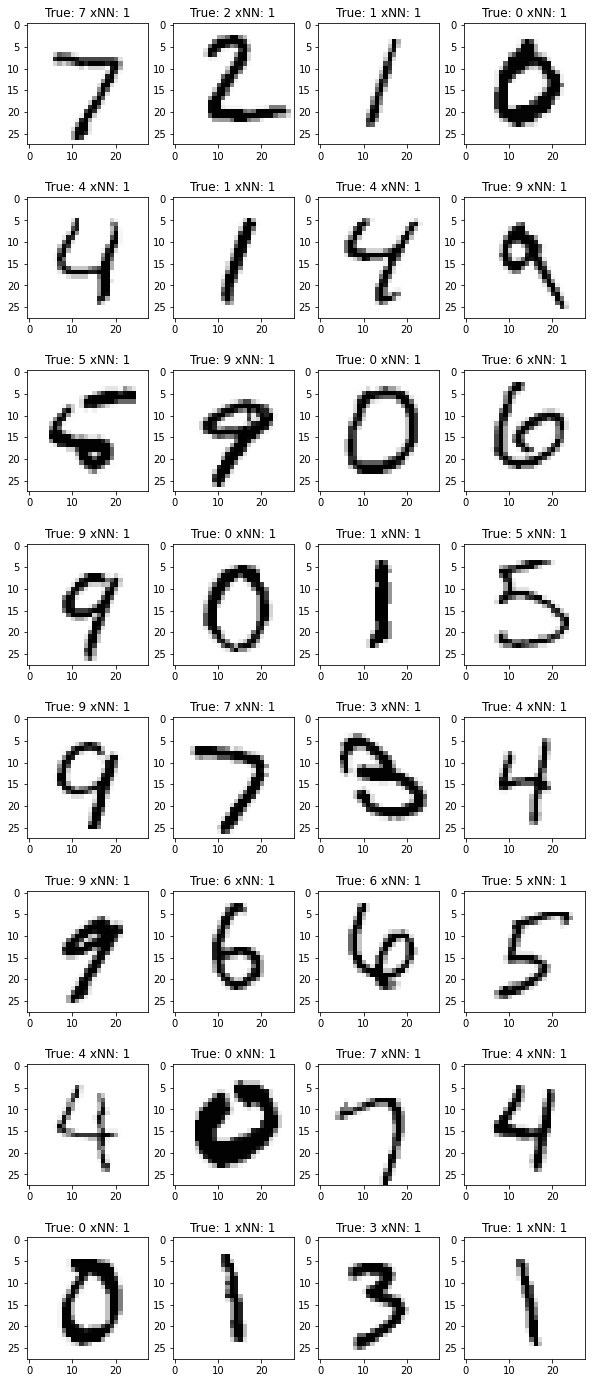

In [61]:
# example display
# replace the xNN predicted label with the label predicted by the network
fig = plt.figure(figsize=(DISPLAY_COL_IN, DISPLAY_ROW_IN))
ax = []
for i in range(DISPLAY_NUM):
    img = test_data[i, :, :, :].reshape((DATA_ROWS, DATA_COLS))
    ax.append(fig.add_subplot(DISPLAY_ROWS, DISPLAY_COLS, i + 1))
    ax[-1].set_title('True: ' + str(test_labels[i]) + ' xNN: ' + str(test_predicted_labels[i]))
    plt.imshow(img, cmap='Greys')
plt.show()